# PDAP2019.2 / Lecture 09: SciPy

10 Dec 2019

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Linear Algebra

In [2]:
from scipy import linalg

### Dot product / matrix product

What is

$$ \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right] \cdot \left[\begin{array}{c} 2\\ -1\\ 3\end{array}\right] = ?$$

In [3]:
mat = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
vec = np.array([2, -1, 3])

In [4]:
mat

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [5]:
vec

array([ 2, -1,  3])

In [6]:
np.dot(mat, vec)

array([14,  2, 25])

In [7]:
mat.dot(vec)

array([14,  2, 25])

### Matrix inverse

In [9]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [10]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [11]:
linalg.inv(np.array([[1, 1], [1, 1,]]))

LinAlgError: singular matrix

In [12]:
np.dot(A, linalg.inv(A))

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
np.allclose(np.dot(A, linalg.inv(A)), np.eye(3))

True

### Linear systems

$    \begin{eqnarray} x + 3y + 5z & = & 10 \\
                      2x + 5y + z & = & 8  \\
                      2x + 3y + 8z & = & 3
    \end{eqnarray}
$

In [16]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([10, 8, 3])

In [17]:
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [18]:
b

array([10,  8,  3])

In [19]:
linalg.solve(A, b)

array([-9.28,  5.16,  0.76])

In [20]:
np.dot(A, linalg.solve(A, b))

array([10.,  8.,  3.])

### Determinants

The determinant of 
$$A = \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right] $$

is

$
    \begin{eqnarray} \left|\mathbf{A}\right| & = & 1\left|\begin{array}{cc} 5 & 1\\ 3 & 8\end{array}\right|-3\left|\begin{array}{cc} 2 & 1\\ 2 & 8\end{array}\right|+5\left|\begin{array}{cc} 2 & 5\\ 2 & 3\end{array}\right|\\  & = & 1\left(5\cdot8-3\cdot1\right)-3\left(2\cdot8-2\cdot1\right)+5\left(2\cdot3-2\cdot5\right)=-25.\end{eqnarray}
$

In [21]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
linalg.det(A)

-25.000000000000004

### Eigenvalues and eigenvectors

In [22]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])

In [24]:
eigenvalues, eigenvectors = linalg.eig(A)

In [25]:
eigenvalues

array([ 7.9579162 +0.j, -1.25766471+0.j,  0.2997485 +0.j])

In [26]:
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
v3 = eigenvectors[:, 2]

In [27]:
v1

array([-0.5297175 , -0.44941741, -0.71932146])

In [28]:
np.dot(A, v1)

array([-4.21544748, -3.57642611, -5.72429989])

In [29]:
eigenvalues[0] * v1

array([-4.21544748+0.j, -3.57642611+0.j, -5.72429989+0.j])

### Linear least squares problems

see https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#solving-linear-least-squares-problems-and-pseudo-inverses

$$ y_i = c_1 e^{-x_i} + c_2 x_i$$

In [31]:
c1, c2 = 5.0, 2.0

xi = np.linspace(0, 1, 11)
y_true = c1 * np.exp(-xi) + c2 * xi

In [32]:
np.random.seed(10)
y_noisy = y_true + .05 * np.max(y_true) * np.random.randn(y_true.size)

In [33]:
A = np.column_stack([np.exp(-xi), xi])
A

array([[1.        , 0.        ],
       [0.90483742, 0.1       ],
       [0.81873075, 0.2       ],
       [0.74081822, 0.3       ],
       [0.67032005, 0.4       ],
       [0.60653066, 0.5       ],
       [0.54881164, 0.6       ],
       [0.4965853 , 0.7       ],
       [0.44932896, 0.8       ],
       [0.40656966, 0.9       ],
       [0.36787944, 1.        ]])

In [35]:
coeff, residual, rank, sigma = linalg.lstsq(A, y_noisy)

In [36]:
coeff

array([5.07541937, 1.95538318])

## Interpolation

### 1-D interpolation

In [37]:
from scipy.interpolate import interp1d

In [39]:
x = np.linspace(0., 10., 11)
y = np.cos(-x**2 / 9.)
plt.plot(x, y, 'o', label='data');

In [40]:
x_new = np.linspace(0., 10., 41)

In [42]:
interp1d(x, y)(x_new)

array([ 1.        ,  0.99845838,  0.99691675,  0.99537513,  0.99383351,
        0.97108755,  0.94834159,  0.92559563,  0.90284967,  0.81221283,
        0.72157599,  0.63093915,  0.54030231,  0.35385005,  0.16739779,
       -0.01905446, -0.20550672, -0.38776657, -0.57002643, -0.75228628,
       -0.93454613, -0.86432051, -0.79409488, -0.72386925, -0.65364362,
       -0.32313274,  0.00737814,  0.33788902,  0.6683999 ,  0.67040116,
        0.67240241,  0.67440367,  0.67640492,  0.27952113, -0.11736267,
       -0.51424647, -0.91113026, -0.65452771, -0.39792516, -0.1413226 ,
        0.11527995])

In [43]:
f_lin = interp1d(x, y)
f_lin(x_new)

array([ 1.        ,  0.99845838,  0.99691675,  0.99537513,  0.99383351,
        0.97108755,  0.94834159,  0.92559563,  0.90284967,  0.81221283,
        0.72157599,  0.63093915,  0.54030231,  0.35385005,  0.16739779,
       -0.01905446, -0.20550672, -0.38776657, -0.57002643, -0.75228628,
       -0.93454613, -0.86432051, -0.79409488, -0.72386925, -0.65364362,
       -0.32313274,  0.00737814,  0.33788902,  0.6683999 ,  0.67040116,
        0.67240241,  0.67440367,  0.67640492,  0.27952113, -0.11736267,
       -0.51424647, -0.91113026, -0.65452771, -0.39792516, -0.1413226 ,
        0.11527995])

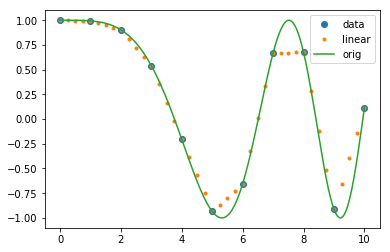

In [46]:
plt.plot(x, y, 'o', label='data')
plt.plot(x_new, f_lin(x_new), '.', label='linear')
plt.plot(np.linspace(0., 10., 1001), np.cos(np.linspace(0., 10., 1001)**2 / 9), label='orig')
plt.legend();

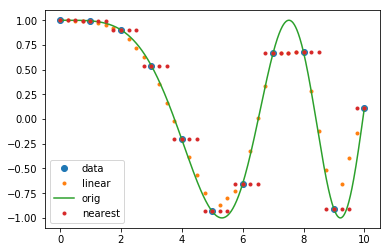

In [47]:
f_nn = interp1d(x, y, kind='nearest')

plt.plot(x, y, 'o', label='data')
plt.plot(x_new, f_lin(x_new), '.', label='linear')
plt.plot(np.linspace(0., 10., 1001), np.cos(np.linspace(0., 10., 1001)**2 / 9), label='orig')
plt.plot(x_new, f_nn(x_new), '.', label='nearest')
plt.legend();

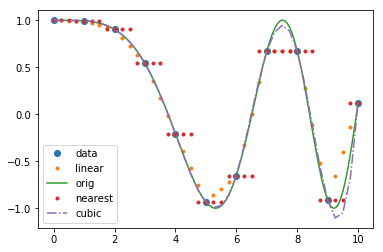

In [49]:
f_cubic = interp1d(x, y, kind='cubic')

plt.plot(x, y, 'o', label='data')
plt.plot(x_new, f_lin(x_new), '.', label='linear')
plt.plot(np.linspace(0., 10., 1001), np.cos(np.linspace(0., 10., 1001)**2 / 9), label='orig')
plt.plot(x_new, f_nn(x_new), '.', label='nearest')
plt.plot(x_new, f_cubic(x_new), '-.', label='cubic')
plt.legend();

### 2-D interpolation

In [50]:
from scipy.interpolate import interpn

Let's suppose we have data on a 2-D grid which has coordinates `x` and `y`.

Here we create the data using `np.cos()`.  Please note that we're using *broadcasting* in order to make a 2-D array from the 2 1-D arrays (check the NumPy documentation for details on what broadcasting is and how it works).

In [80]:
x = np.linspace(1., 6., 6)
y = np.linspace(0., 7., 8)[:, np.newaxis]
z = np.cos(x * y**2 - 2. * x).T

`z` is now an array with shape `(6, 8)`:

In [81]:
z.shape

(6, 8)

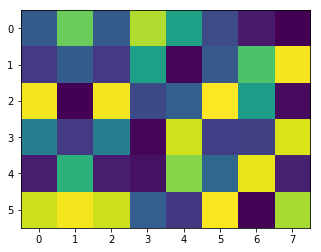

In [82]:
plt.imshow(z);

Now, we can use `interpn()` to interpolate this 2-D data to any point in the `x/y` plane.

As a first example, we'll look at `(x, y) = (1.0, 1.0)`:

In [84]:
interp_points =  np.asarray([[1., 1.]])

`interpn()` needs three arguments:

1. The coordinates of the original data, i.e., the `x` and `y` points (both as 1-D), as a tuple.  Note how we have to use `y[:, 0]` instead of just `y` because our `y` array from above is 2-D.
2. The actual original data
3. The coordinates of the points we want to interpolate at, as 2-D array of shape `(npoints, ndim)` (i.e., for one single interpolation point, `(1, 2)`)

In [85]:
interpn((x, y[:, 0]), z, interp_points)

array([0.54030231])

Of course this is actually the same value as `z[0, 1]`; after all, the point `(1.0, 1.0)` is one of the points where our original data are defined at.

In [86]:
z[0, 1]

0.5403023058681398

In order to do some real interpolation, we now choose the points `(1.5, 0.5)`, `(2.5, 0.5)`, `(1.5, 1.5)`, `(2.5, 1.5)`:

In [88]:
interp_points_2 = np.asarray([[1.5, .5], [2.5, .5], [1.5, 1.5], [2.5, 1.5]])
interp_points_2.shape

(4, 2)

In [89]:
interpn((x, y[:, 0]), z, interp_points_2)

array([-0.23640875, -0.27490317, -0.23640875, -0.27490317])

The first of these four points will have the same value as `z[:2, :2]`, because we're using linear interpolation:

In [92]:
z[:2, :2].mean()

-0.23640874702243925

Now, let's look at nearest-neighbor interpolation:

In [97]:
interp_points_3 = np.asarray([[1.3, .3], [1.3, .6], [1.6, .3], [1.6, .6]])
interp_points_3

array([[1.3, 0.3],
       [1.3, 0.6],
       [1.6, 0.3],
       [1.6, 0.6]])

In [98]:
interpn((x, y[:, 0]), z, interp_points_3, method='nearest')

array([-0.41614684,  0.54030231, -0.65364362, -0.41614684])

As expected, these four values are exactly the same values as `z[:2, :2]` because the nearest-neighbor interpolation assigns to each interpolation point the value of the closest original data point:

In [96]:
z[:2, :2]

array([[-0.41614684,  0.54030231],
       [-0.65364362, -0.41614684]])